Importing  the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


In [4]:
dataset = pd.read_csv("/content/Air_quality.csv")

In [5]:
dataset.head()

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
0,1/8/2018,86,31,21,129,24,129,o3,TIDAK SEHAT,DKI5
1,2/8/2018,68,31,18,207,20,207,o3,SANGAT TIDAK SEHAT,DKI5
2,3/8/2018,68,32,16,211,17,211,o3,SANGAT TIDAK SEHAT,DKI2
3,4/8/2018,59,31,16,194,16,194,o3,TIDAK SEHAT,DKI5
4,5/8/2018,65,35,14,203,16,203,o3,SANGAT TIDAK SEHAT,DKI2


Splitting the dataset

In [6]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(dataset,test_size = 0.2,random_state = 1)

In [7]:
train.shape

(1030, 10)

In [9]:
train.isnull().sum()

tanggal        0
pm10           0
so2            0
co             0
o3             0
no2            0
max            0
critical       0
categori       0
lokasi_spku    0
dtype: int64

In [10]:
train.describe()

,pm10,so2,co,o3,no2,max
count,1030.000000,1030.00000,1030.000000,1030.000000,1030.000000,1030.000000
mean,63.058252,35.32233,21.604854,91.249515,19.804854,96.498058
std,15.044621,13.50143,10.067227,45.291120,11.960730,41.162286
min,21.000000,13.00000,0.000000,20.000000,3.000000,41.000000
25%,55.000000,25.00000,16.000000,55.000000,13.000000,66.000000
50%,64.000000,31.00000,20.000000,80.000000,16.000000,83.000000
75%,72.000000,43.00000,25.000000,119.000000,22.000000,119.000000
max,179.000000,126.00000,88.000000,243.000000,104.000000,243.000000


Visulaizing

In [25]:
train = pd.DataFrame(train)

In [26]:
train['tanggal'] = pd.to_datetime(train['tanggal'])

In [27]:
numeric_cols = train.select_dtypes(include=[np.number]).columns.tolist()

# Calculate correlation matrix
correlation_matrix = train[numeric_cols].corr()

In [16]:
print(train.dtypes)

tanggal        object
pm10            int64
so2             int64
co              int64
o3              int64
no2             int64
max             int64
critical       object
categori       object
lokasi_spku    object
dtype: object


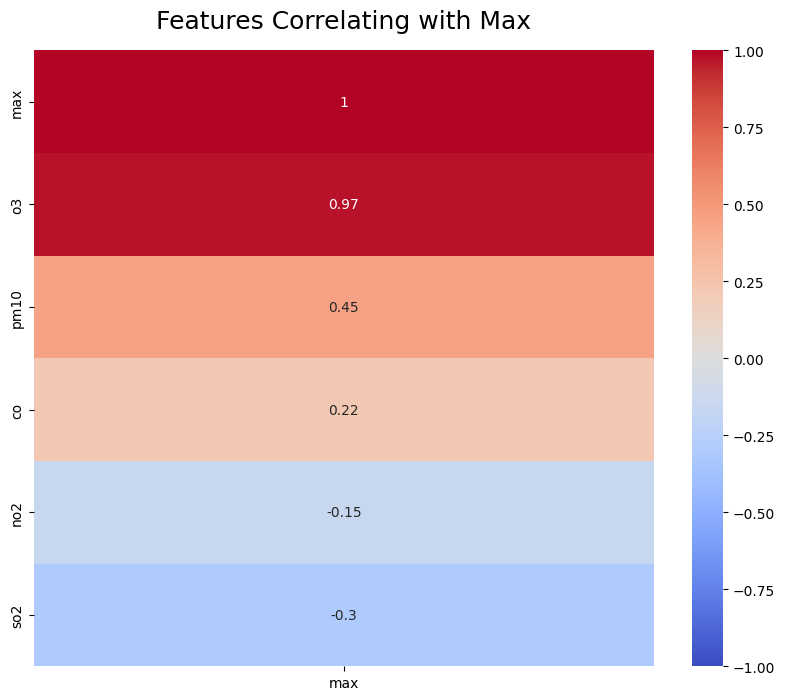

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['max']].sort_values(by='max', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Features Correlating with Max', fontsize=18, pad=16)
plt.show()

In [29]:
pollutants = ['co','no2', 'o3', 'so2', 'pm10']

In [31]:
import plotly.express as px
correlation_matrix = train[pollutants].corr()
fig = px.imshow(correlation_matrix, x=pollutants,
 y=pollutants, title="Correlation Between Pollutants")
fig.show()

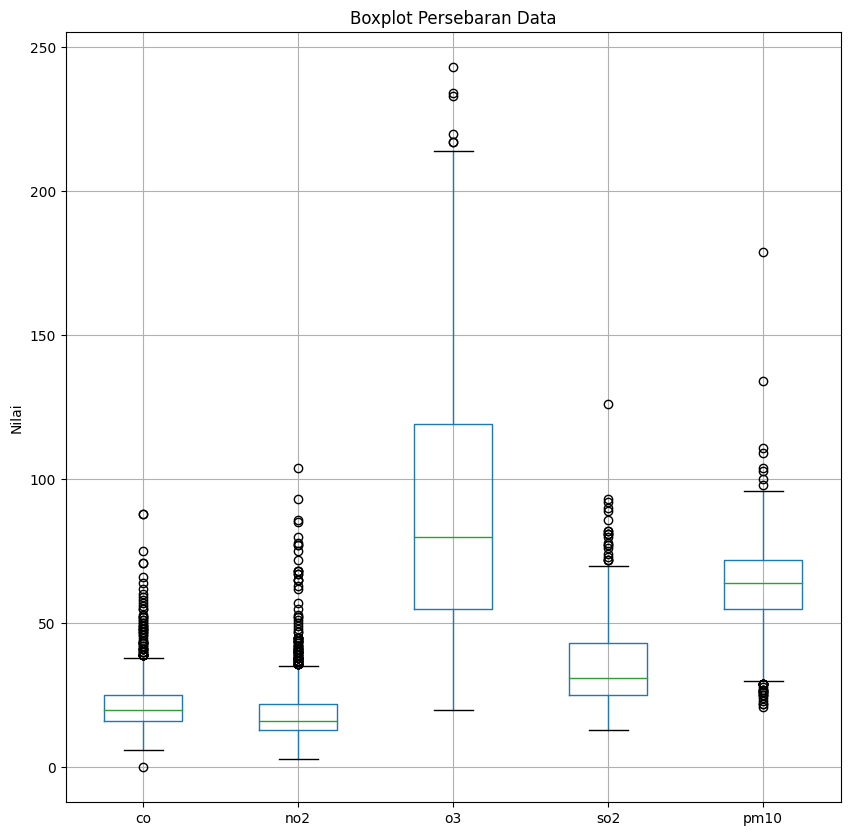

In [32]:
plt.figure(figsize=(10, 10))
train.boxplot(column=['co','no2', 'o3', 'so2', 'pm10'])
# Menambahkan label
plt.title('Boxplot Persebaran Data')
plt.ylabel('Nilai')

# Tampilkan boxplot
plt.show()

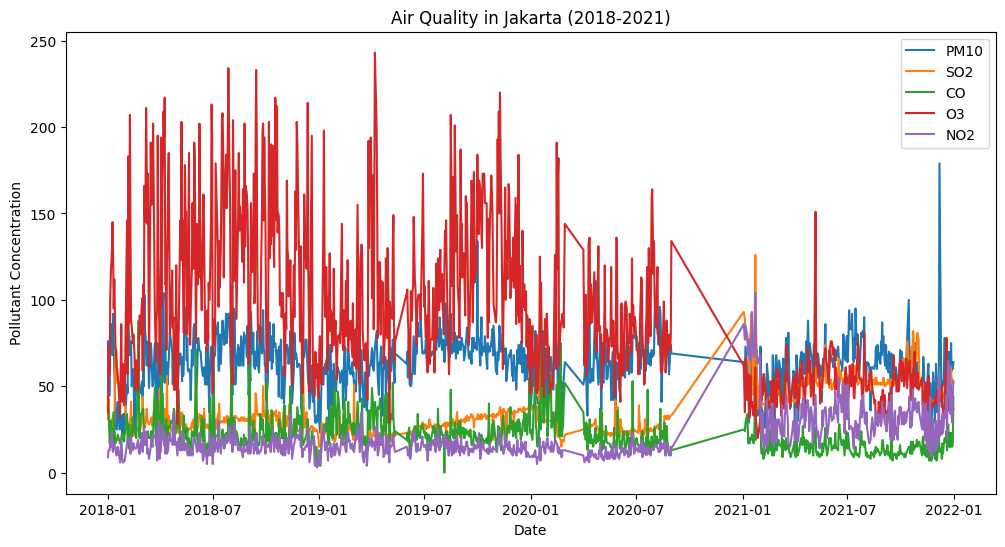

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x='tanggal', y='pm10', label='PM10')
sns.lineplot(data=train, x='tanggal', y='so2', label='SO2')
sns.lineplot(data=train, x='tanggal', y='co', label='CO')
sns.lineplot(data=train, x='tanggal', y='o3', label='O3')
sns.lineplot(data=train, x='tanggal', y='no2', label='NO2')
plt.xlabel('Date')
plt.ylabel('Pollutant Concentration')
plt.title('Air Quality in Jakarta (2018-2021)')
plt.legend()
plt.show()

In [34]:
pollutant_colors = px.colors.qualitative.Plotly

# Calculate the sum of pollutant concentrations
total_concentrations = train[pollutants].sum()

# Create a DataFrame for the concentrations
concentration_data = pd.DataFrame({
 "Pollutant": pollutants,
 "Concentration": total_concentrations
})

# Create a donut plot for pollutant concentrations
fig = px.pie(concentration_data, names="Pollutant", values="Concentration",
 title="Pollutant Concentrations in Jakarta",
 hole=0.4, color_discrete_sequence=pollutant_colors)

# Update layout for the donut plot
fig.update_traces(textinfo="percent+label")
fig.update_layout(legend_title="pollutants")
fig.show()


In [39]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
labelnc = LabelEncoder()

In [41]:
train['categori'] = labelnc.fit_transform(train['categori'])
train['categori'].unique()
train.head()

,tanggal,pm10,so2,co,o3,no2,max,critical,categori,lokasi_spku
188,2018-08-03,55,29,47,107,22,107,o3,3,DKI5
189,2018-09-03,59,30,59,81,27,81,o3,2,DKI5
304,2018-01-09,68,29,20,145,13,145,o3,3,DKI5
776,2020-02-06,63,30,26,50,18,63,pm10,2,DKI2
694,2019-09-15,74,31,22,99,14,99,o3,2,DKI5


In [42]:
X = train.drop(columns=["categori","lokasi_spku","tanggal","critical"])
y = train[["categori"]]

In [51]:
testb = test.drop(columns=["categori","lokasi_spku","tanggal","critical"])

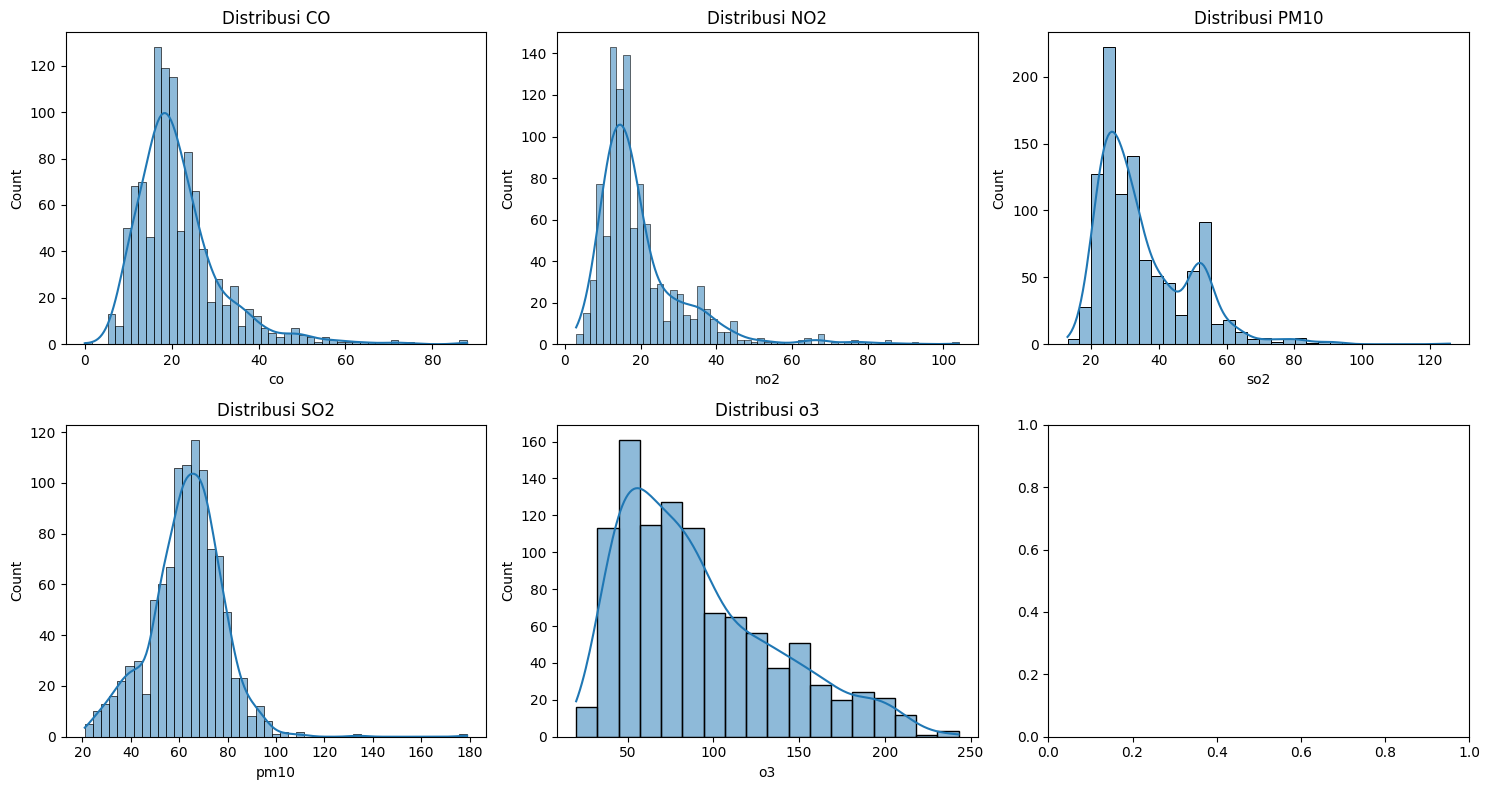

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Plot histogram untuk setiap kolom
sns.histplot(train['co'], kde=True, ax=axes[0, 0]).set(title=f'Distribusi CO')
sns.histplot(train['no2'], kde=True, ax=axes[0, 1]).set(title=f'Distribusi NO2')
sns.histplot(train['so2'], kde=True, ax=axes[0, 2]).set(title=f'Distribusi PM10')
sns.histplot(train['pm10'], kde=True, ax=axes[1, 0]).set(title=f'Distribusi SO2')
sns.histplot(train['o3'], kde=True, ax=axes[1, 1]).set(title=f'Distribusi o3')

# Box plot untuk melihat distribusi lebih lanjut
#sns.boxplot(x=nama_kolom_co, data=df, ax=axes[1, 2]).set(title=f'Box Plot {nama_kolom_co}')

# Sesuaikan tata letak subplot
plt.tight_layout()

# Tampilkan plot
plt.show()

In [46]:
def outlieratas(column_name):
    Q1=train[column_name].quantile(0.25)
    Q3=dataset[column_name].quantile(0.75)
    IQR=Q3-Q1
    Upper_Whisker = Q3+1.5*IQR
    return Upper_Whisker

def outlierbawah(column_name):
    Q1=train[column_name].quantile(0.25)
    Q3=dataset[column_name].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1-1.5*IQR
    return Lower_Whisker

In [47]:
train.drop(train[train['co'] == 88].index, inplace=True)
train.drop(train[train['so2'] == 126].index, inplace=True)
train.drop(train[train['pm10'] == 179].index, inplace=True)
train.drop(train[train['o3'] == 243].index, inplace=True)
train.drop(train[train['no2'] == 93].index, inplace=True)
train['co'] = train['co'].replace(0, train['co'].median())

In [48]:
def handle_positive_outliers(column_name):
    outlier_threshold = outlieratas(column_name)
    outlier_mask = train[column_name] > outlier_threshold

    # Hitung mean dari kolom (tanpa outlier)
    mean_value = train[~outlier_mask][column_name].mean()

    # Ganti nilai outlier dengan mean
    train.loc[outlier_mask, column_name] = mean_value

def handle_negative_outliers(column_name):
    outlier_threshold = outlierbawah(column_name)
    outlier_mask = train[column_name] < outlier_threshold

    # Hitung mean dari kolom (tanpa outlier)
    mean_value = train[~outlier_mask][column_name].mean()

    # Ganti nilai outlier dengan mean
    train.loc[outlier_mask, column_name] = mean_value

handle_positive_outliers('co')
handle_positive_outliers('no2')
handle_positive_outliers('so2')
handle_positive_outliers('o3')

In [50]:
train['co']= np.sqrt(train['co'])
train['so2']= np.log1p(train['so2'])
train[['o3','no2']]= train[['o3','no2']].apply(lambda x: np.log(x))
# train.skew()

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(testb)

In [53]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled,y,test_size=0.2,random_state=0)

In [55]:
model = GradientBoostingClassifier()
model.fit(x_train,y_train)
pred1 = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [56]:
pred = model.predict(testb)
testb["categori"]= pred
testb.head()

,pm10,so2,co,o3,no2,max,categori
908,74,23,18,122,9,122,3
1087,69,53,13,58,26,69,3
491,71,47,16,132,25,132,3
267,57,25,21,77,15,77,2
460,56,27,27,86,10,86,2
